# CS273A Homework 2

## Due Wednesday, October 16th, 11:59pm

---
## Instructions


This homework (and subsequent ones) will involve data analysis and reporting on methods and results
using Python code. You will submit a **single PDF file** that contains everything to Gradescope. This includes any text you wish to include to describe your results, the complete code snippets of how you attempted each problem, any figures that were generated, and scans of any work on paper that you wish to include. It is important that you include enough detail that we know how you solved the problem, since otherwise we will be unable to grade it.

Your homeworks will be given to you as Jupyter notebooks containing the problem descriptions and some template code that will help you get started. You are encouraged to use these starter Jupyter notebooks to complete your assignment and to write your report. This will help you not only ensure that all of the code for the solutions is included, but also will provide an easy way to export your results to a PDF file (for example, doing *print preview* and *printing to pdf*). I recommend liberal use of Markdown cells to create headers for each problem and sub-problem, explaining your implementation/answers, and including any mathematical equations. For parts of the homework you do on paper, scan it in such that it is legible (there are a number of free Android/iOS scanning apps, if you do not have access to a scanner), and include it as an image in the Jupyter notebook.

**Double check that all of your answers are legible on Gradescope, e.g. make sure any text you have written does not get cut off.**

If you have any questions/concerns about using Jupyter notebooks, ask us on EdD. If you decide not to use Jupyter notebooks, but go with Microsoft Word or LaTeX to create your PDF file, make sure that all of the answers can be generated from the code snippets included in the document.

### Summary of Assignment: 100 total points
- Problem 1: k-Nearest Neighbors (20 points)
    - Problem 1.1: Splitting data into training & test sets (8 points)
    - Problem 1.2: Plot predictions for different values of k (8 points)
    - Problem 1.3: Display performance as a function of k & select best (4 points)
    
- Problem 2: Linear Regression (20 points)
    - Problem 2.1: Train the model and plot the data along with its predictions (10 points)
    - Problem 2.2: Compute the MSE loss for the training and evaluation data (10 points)
    
- Problem 3: Feature transformations (20 points)
    - Problem 3.1: Train & display polynomial regression models using feature transforms (10 points)
    - Problem 3.2: Plot the training & evaluation error as a function of degree (5 points)
    - Problem 3.3: Select the best degree for these data (5 points)

- Problem 4: Cross-Validation (20 points)
    - Problem 4.1: Plot the five-fold cross validation error (10 points)
    - Problem 4.2: Select the best degree using cross-validation (5 points)
    - Problem 4.3: Compare cross-validation model selection to hold-out data (5 points)
    
- Problem 5: Regularization (15 points)
    - Problem 5.1: Train L2-regularized linear regression ('Ridge regression') (5 points)
    - Problem 5.2: Plot MSE as a function of the regularization amount (5 points)
    - Problem 5.3: Select the best amount of regularization (5 points)
    
- Statement of Collaboration (5 points)

<center> <img src="http://sli.ics.uci.edu/extras/sep.png" alt="--------------------------------------------" width="200px" height="20px" style="width:200px;height:20px;"/> </center>

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_squared_error as mse

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.linear_model import LinearRegression    # Basic Linear Regression
from sklearn.linear_model import Ridge               # Linear Regression with L2 regularization

from sklearn.model_selection import KFold            # Cross-validation tools

from sklearn.preprocessing import PolynomialFeatures # Feature transformations
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline                # Useful for sequences of transforms

import requests                                      # reading data
from io import StringIO

seed = 1234

# Training / Test Splits

As we've seen in lecture, it is difficult to tell how accurate our model is from only the data on which it has been trained.  For this reason, we usually reserve some data for evaluation, often called "validation" or "test" data.  We'll start by loading a one-dimensional regression data set to use in the rest of the homework.  We will divide this data set into 75% training data, and 25% evaluation data:

In [86]:
url = 'https://www.ics.uci.edu/~ihler/classes/cs273/data/curve80.txt'

with requests.get(url) as link: curve = np.genfromtxt(StringIO(link.text),delimiter=None)

X = curve[:,0:-1]      # extract features
Y = curve[:,-1]        # extract target values

# split into training and evaluation data
Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.25, random_state=seed)

# P1: K-Nearest Neighbors Regression

### P1.1: Visualizing the Data Splits

Plot the data for this regression problem, with the (scalar) feature $x$ along the horizontal axis, and the real-valued target $y$ as the vertical axis.  Plot all the data, displaying the training data $X_t$ in one color, and the evaluation data $X_e$ in a different color.

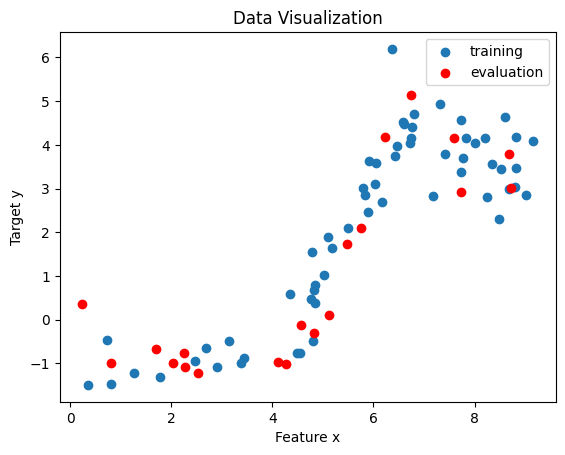

In [87]:
# plotting training data - blue 
plt.scatter(Xt, Yt, label="training")
# plot evaluation date - red 
plt.scatter(Xe, Ye, color='red', label="evaluation")
plt.xlabel("Feature x") # x axis label 
plt.ylabel("Target y") # y axis label 
plt.title("Data Visualization")
plt.legend() # shoe the legend 
plt.show()


### P1.2 Visualizing KNN Regression Predictions

Now use `sklearn`'s `KNeighborsRegressor` class to build a nearest neighbor regression model on your training data.  Build three models, using $k=1$, $k=5$, and $k=20$, and for each one display the training data, test data, and prediction function.  (Note: you can evaluate the prediction function of your learner by predicting at a dense collection of locations `x_spaced` along the x-axis, and then predicting at these points and connecting them using `plot`.)

Here i use KNeighborRegressor(). when a new data point is given from the eval data, the distance between this new point and all points in the training data is calculated (using euclidean distance). then the k nearest neighbors - based on smallest distance - are identified. the prediction then takes the mean of all these k nearest neighbor values and that is the predicted y. i then plot the predicted y, trainging data, and evaluation data. 

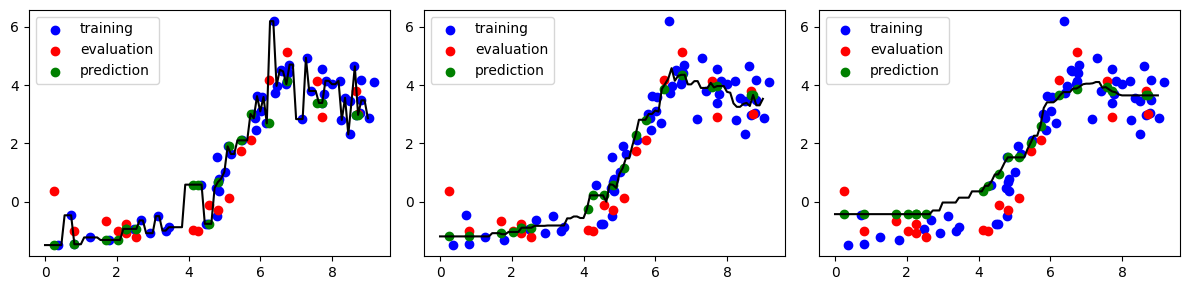

In [88]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x_spaced = np.linspace(0,9,100).reshape(-1,1)  # get a collection of x-locations at which to plot f(x)

### YOUR CODE STARTS HERE ###

for i, k in enumerate([1,5,20]):
    # creating the nearest neighbor regression model 
    knn = KNeighborsRegressor(n_neighbors=k)
    # fit model to training data 
    knn.fit(Xt, Yt)
    # predict using evaluation data 
    y_pred = knn.predict(Xe)
    y_pred_spaced = knn.predict(x_spaced)
    # visulaizations
    axes[i].scatter(Xt, Yt, color='blue', label='training') # plotting training data 
    axes[i].scatter(Xe, Ye, color='red', label='evaluation') # plotting eval data 
    axes[i].scatter(Xe, y_pred, color='green', label='prediction') # plotting prediction
    axes[i].plot(x_spaced, y_pred_spaced, color='black')
    axes[i].legend() # show legend 

###  YOUR CODE ENDS HERE  ###

fig.tight_layout()


### P1.3: KNN Model Selection

Train a model for each $k$ in $1 \leq k \leq 30$, and compute their training and validation MSE.  Plot these values as a function of $k$.  What is the best value of $k$ for your model?

For this step, the code follows the general steps of the previous cell but we have more iterations here as we are iterating through a larger number of k values and i am also computing the MSE on train and evel data for each number of k neighbors. 

Based on the graph and the relationship between number of neighbors and MSE i think the best value of k is around 20-25. in this range, MSE is lowest. around this point, both the train and eval lines start to get closer together, meaning the model is starting to generalize better, with both training and eval errors decreasing and converging. 


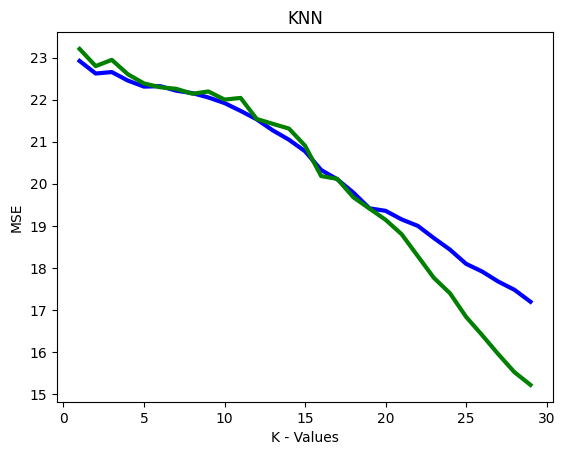

In [95]:
k_values = list(range(1,30))
mse_train = []
mse_eval = []

for i,k in enumerate(k_values):

    ### YOUR CODE STARTS HERE ###
    
    # create nearest neighbor regressor using k number of neighbors 
    knn = KNeighborsRegressor(n_neighbors=k) 
    knn.fit(Xt, Yt)

    # predict on training data 
    y_predTrain = knn.predict(Xt)
    # predict of eval data 
    y_predEval= knn.predict(Xe)

    # calculate mean squared error 
    mse_train.append(np.square(np.subtract(Xt, y_predTrain)).mean())
    mse_eval.append(np.square(np.subtract(Xe, y_predEval)).mean())

    ###  YOUR CODE ENDS HERE  ###

plt.plot(k_values,mse_train,'b-', k_values,mse_eval,'g-', lw=3);
plt.xlabel("K - Values");
plt.ylabel("MSE");
plt.title("KNN");

# P2: Linear Regression

### P2.1: Train linear regression model
Now, let's train a simple linear regression model on the training data.  After training the model, plot the training data (colored blue), evaluation data (colored red), and our linear fit (a line) together on a single plot.  Also print out the coefficients (slope, `lr.coef_`, and intercept, `lr.intercept_`) of your model after fitting.

Slope:  [0.77684721] intercept:  -2.3463013180118275


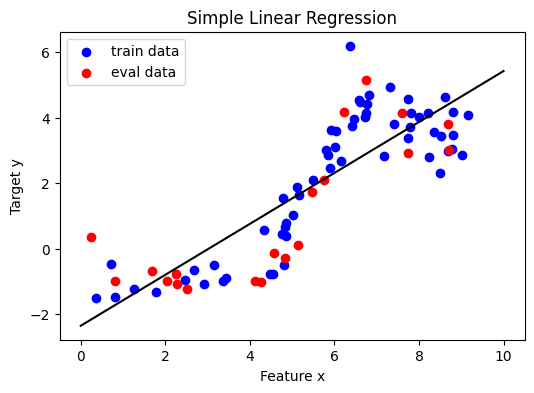

In [90]:
### YOUR CODE STARTS HERE ###

# create and fit model to training data
lr = LinearRegression().fit(Xt, Yt)      

# to plot the prediction, we'll evaluate our model at 
# a dense set of locations:

# data points should be shape (m,1)
x_spaced = np.linspace(0,10,200).reshape(-1,1)   
yhat_spaced = lr.predict(x_spaced)

plt.figure(figsize=(6,4))

# plot the train data, eval data, and linear fit
plt.scatter(Xt, Yt, color='blue', label="train data")
plt.scatter(Xe, Ye, color='red', label="eval data")
plt.plot(x_spaced, yhat_spaced, color='black')  

# title and labels 
plt.title("Simple Linear Regression")
plt.xlabel("Feature x")
plt.ylabel("Target y")
plt.legend()

# print slope & intercept of your fit model
print("Slope: ", lr.coef_ , "intercept: " , lr.intercept_) 

###  YOUR CODE ENDS HERE  ###

### P1.2 Evaluate your model's fit

Compute the mean squared error of your trained model on the training data (the data it was fit on) and the held-out evaluation data.

In [91]:
pred_train = lr.predict(Xt)
MSE_train = np.square(np.subtract(Yt, pred_train)).mean()

pred_eval = lr.predict(Xe)
MSE_eval = np.square(np.subtract(Ye, pred_eval)).mean()

print(f"MSE on train data: {MSE_train}")
print(f"MSE on eval data {MSE_eval}")


MSE on train data: 1.270893125474928
MSE on eval data 1.6723519225582435


## Problem 3: Feature Transformations

Often we will want to transform our data (as we saw in class).  A very simple version of this transformation is "normalizing" the data, in which we shift and scale the feature values to a desirable range; typically, zero mean and unit variance, for example.  The ``StandardScaler()`` object in scikit-learn implements such a transformation.

Typically, a pre-processing transformation works in a similar way to training a model: we ``fit`` the object to our training data (in this case, computing the empirical mean and variance of the data), and save the parameters of the transformation (the shift and scale values) so that we can apply exactly the same transformation to subsequent data, for example when asked to predict on a new value of $x$.

So, for example:

In [92]:
scale = StandardScaler().fit(Xt)     # find the desired transformation
X_transformed = scale.transform(Xt)  # & apply it to the training data

# Now, we can train our model on X_transformed...
# lr = LinearRegression()...

# Before we predict, we also need to transform the test point's values:
yhat_spaced = lr.predict(scale.transform(x_spaced))

If you like (and as described in the Discussion code), you can use `sklearn`'s `Pipeline` object to simplify the process of sequentially applying transformations before a predictor.

In [ ]:
pipe = Pipeline( [('scale',StandardScaler()),('linreg',LinearRegression())])
pipe.fit( ... )     # call fit on each element in the pipeline
pipe.predict( ... ) # call transform on each element but last, then predict on the last 

## P3.1: Train polynomial regression models
As mentioned in the homework, you can create additional features manually, e.g.,

In [8]:
m,n = Xt.shape            # rest of this cell assumes n=1 feature
Xt2 = np.zeros((m,2))
Xt2[:,0] = Xt[:,0]
Xt2[:,1] = Xt[:,0]**2
print (Xt.shape)
print (Xt2.shape)
print (Xt2[0:6,:])   # look at a few data points to check:

(60, 1)
(60, 2)
[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


or, you can create them using SciKit's PolynomialFeatures transform object:

In [9]:
Phi = PolynomialFeatures(degree=2,include_bias=False).fit(Xt)
Xt2 = Phi.transform(Xt)
print (Xt2[0:6,:])   # look at the same data points -- same values

[[ 0.72580645  0.526795  ]
 [ 2.4769585   6.13532341]
 [ 7.7304147  59.75931143]
 [ 9.0207373  81.37370144]
 [ 8.6751152  75.25762373]
 [ 6.4631336  41.77209593]]


**Now, try fitting** a linear regression model using different numbers of polynomial features of $x$.

For each degree $d \in \{0,1,3,5,7,10,15,18\}$:

- Fit a linear regression model using features consisting of all powers of $x$ up to degree $d$
    - Make sure you apply ``StandardScaler`` to the transformed data before training
- Plot the resulting prediction function $f(x)$, along with the training and validation data as before


Here we are creating a feature expanison to better see how we can fit the data. i iterate through the degree array and for each one, do a feature transformation, rescale the data, and then do the linear regression on this transformed data. i then plot the new regression function as well and the train and eval data. 

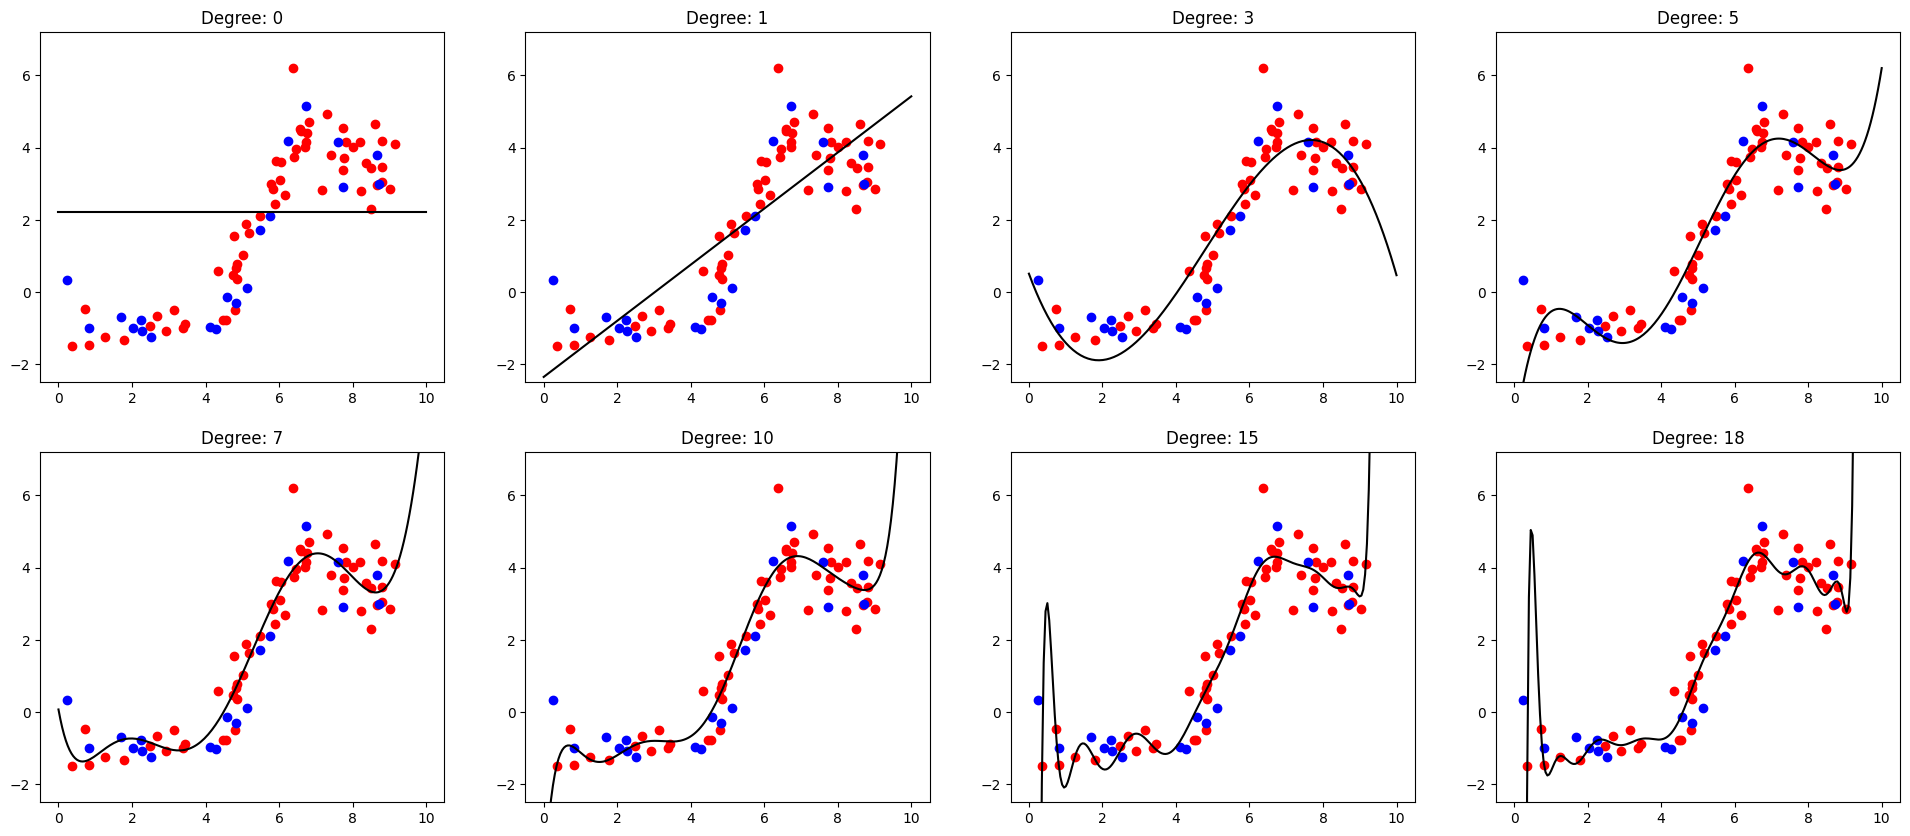

In [65]:
degrees = [0,1,3,5,7,10,15,18]
learners = [ [] ]*len(degrees)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,degree in enumerate(degrees):

    ### YOUR CODE STARTS HERE ###

    # Create a polynomial feature expansion of degree d
    # *** Get error include_bias to False would result in an empty 
    # *** output array so setting it to true 
    phi = PolynomialFeatures(degree=degree, include_bias=True).fit(Xt)
    Xt2 = phi.transform(Xt)
    # Use StandardScaler to rescale the transformed data
    scale = StandardScaler()     # find the desired transformation
    X_transformed = scale.fit_transform(Xt2)  # & apply it to the training data

    # Fit your linear regression and save it to "learners"
    model = LinearRegression().fit(X_transformed, Yt)
    learners[i] = model

    # now make predictions on training data 
    # to plot the prediction, we'll evaluate our model at a dense set of locations:
    x_spaced = np.linspace(0,10,200).reshape(-1,1)   # data points should be shape (m,1)
    x_pred_poly = scale.transform(phi.transform(x_spaced))
    y_pred = model.predict(x_pred_poly)

    axi = ax[i//4,i%4]

    # plot prediction function
    axi.plot(x_spaced, y_pred, color='black') 
    # plot training data 
    axi.scatter(Xt, Yt, color='red')
    # plot eval data 
    axi.scatter(Xe, Ye, color='blue')
    # you'll want to set a consistent y-scale for comparison
    axi.set_ylim([Yt.min() -1 , Yt.max() + 1]) 
    # don't forget to label your plots
    axi.set_title(f'Degree: {degree}') 

    ###  YOUR CODE ENDS HERE  ###


## P3.2 Model Performance
Compute the mean squared error (MSE) loss of each of your trained models on both the training data and the evaluation data.  Plot these errors as a function of degree (so, degree along the horizontal axis, MSE loss as the vertical axis).

The code here is the same as the code in the cell above. the only addition here is that i am now using each degree and calculating the MSE for train and eval data which i can then use to pick which degree best fits the data. 

Text(0, 0.5, 'MSE')

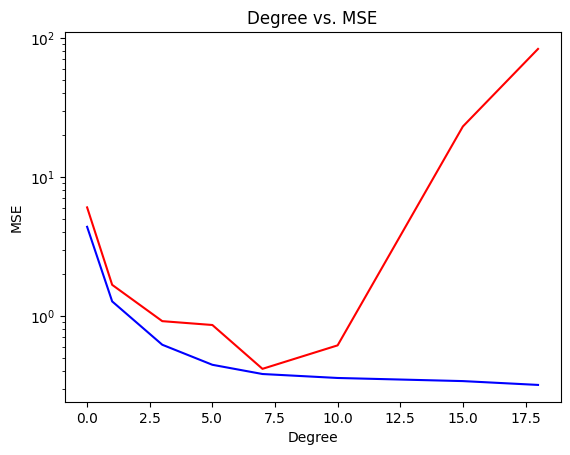

In [67]:
mse_train = [0]*len(degrees)
mse_test = [0]*len(degrees)

for i,degree in enumerate(degrees):
    # Recompute the degree-d poly transform if you didn't save it!

    # Create a polynomial feature expansion of degree d

    # *** Get error include_bias to False would result in an empty 
    # *** output array so setting it to true 
    phi = PolynomialFeatures(degree=degree, include_bias=True).fit(Xt)
    Xt2 = phi.transform(Xt) # train
    Xe2 = phi.transform(Xe) # eval

    # Use StandardScaler to rescale the transformed data
    scale = StandardScaler() # find the desired transformation
    # & apply it to the training data
    X_transformed_train = scale.fit_transform(Xt2)  
    X_transformed_eval = scale.transform(Xe2)

    # Fit your linear regression using training data
    model = LinearRegression().fit(X_transformed_train, Yt)

    # Predict for train data 
    y_pred_train = model.predict(X_transformed_train)

    # predict for eval data 
    y_pred_eval = model.predict(X_transformed_eval)

    # calculate MSE
    mse_train[i] = np.square(np.subtract(Yt, y_pred_train)).mean()
    mse_test[i] = np.square(np.subtract(Ye, y_pred_eval)).mean()

# plot mse_train and mse_test as a function of the degree
plt.semilogy(degrees, mse_train, color='blue', label="train")
plt.semilogy(degrees, mse_test, color='red', label='eval')  
plt.title("Degree vs. MSE")
plt.xlabel('Degree')
plt.ylabel("MSE")

## P3.3 Model Selection
Which degree would you select to use?

After analyzing both the output in question 3.1 and comparing MSE values for each degree, i would select the 5th degree. this is where both the training data and evaluation data are closest together and error is at a minimum. 7th degree and higher have an extremely high MSE meaning it is overfitting. The 5th degree provides the best balance between fitting the training data as well as generalizing well to the eval data. 

# P4: Cross-validation
Cross validation is another method of model complexity assessment.  We use it only to determine the correct setting of complexity-altering parameters ("hyperparameters"), such as how many and which features to use, or parameters like "k" in KNN, for which training error alone provides little information.  In particular, cross validation will not produce a specific model (parameter values), only a setting of the hyperparameter values that cross-validation thinks will lead to a model (parameter values) with low test error.

## P4.1:  5-Fold Cross-validation

In the previous problem, we decided what degree of polynomial fit to use based on the performance on a held-out set of test data.  Now suppose that we do not have access to the target values of those data.  How can we determine the best degree?  

We could perform another split; but since this is reducing the number of data available, let us instead use cross-validation to evaluate the degrees.  Cross-validation works by splitting the training data $X_T$ multiple times, one for each of the $K$ partitions (``n_splits`` in the code), and repeat our entire training and evaluation procedure on each split:

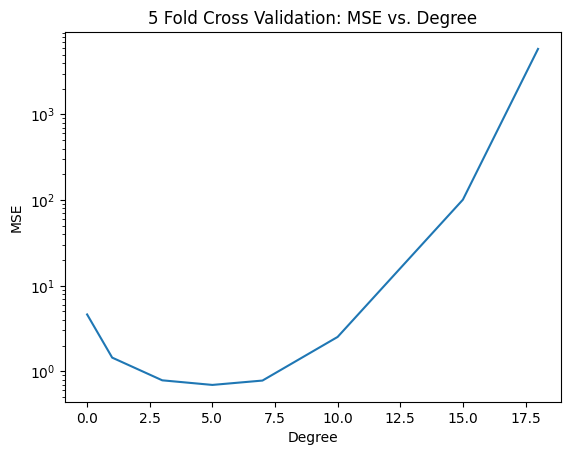

In [96]:
mse_xval = [ 0. ]*len(degrees)

for j,degree in enumerate(degrees): # loop over desired degree values

    ### YOUR CODE STARTS HERE ###

    xval = KFold(n_splits = 5) # split into k=5 splits
    mse = [] # used to store mse value for each iteration 

    for train_index, val_index in xval.split(Xt):
        # Extract the ith cross-validation fold (training/validation split)
        Xti,Xvi,Yti,Yvi = Xt[train_index],Xt[val_index],Yt[train_index],Yt[val_index]

        # Now, build the model:

        # Create a polynomial feature expansion
        phi = PolynomialFeatures(degree=degree, include_bias=True).fit(Xti)
        Xti2 = phi.transform(Xti) # transform train data 
        Xvi2 = phi.transform(Xvi) # transform eval data 

        # Create a StandardScaler
        scale = StandardScaler()
        # scale training data 
        X_transformed_train = scale.fit_transform(Xti2) 
        # scale eval data 
        X_transformed_eval = scale.transform(Xvi2)
        
        # Fit the linear regression model on the training folds, Xti/Yti
        model = LinearRegression().fit(X_transformed_train, Yti)

        # now predict on eval data 
        y_pred_eval= model.predict(X_transformed_eval)
        
        # Compute the MSE on the evaluation fold, Xvi/Yvi
        mse.append(np.square(np.subtract(Yvi, y_pred_eval)).mean())

    # Evaluate the quality of this degree by averaging the MSE across the five folds
    mse_xval[j] = np.mean(mse)

# Plot the estimated MSE from cross-validation as a function of the degree
plt.semilogy(degrees, mse_xval)
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("5 Fold Cross Validation: MSE vs. Degree");
             
    ###  YOUR CODE ENDS HERE  ###

## P4.2: Cross-validation model selection

What degree would you choose based on the cross validation performance?

I would choose either the 3rd or 5th degreee. At these degrees, MSE is the lowest while also fitting the data pretty well. when we move to larger degrees: 7, 10, 15, 18 - MSE increases significantly and starts overfitting the data. 

## P4.3 Comparison to test performance

How do the MSE estimates from 5-fold cross-validation compare to the estimated test performance you found from your held-out data, $X_E$?  Explain briefly.

when comparing MSE from 5 fold cross validation vs. held out data, they seem to follow a similar trend. MSE is lower for degrees 1-3 in cross validation and a lot higher in held out eval data. degree 5 is the same for both. Degrees 7 and abouve have a very high MSE in both as well. 

# P5 : Regularization

In systems where we already have a lot of features, or where we do not know which of the many features we might construct will be helpful, we can use regularization to help us control overfitting.

## P5.1: Regularized Regression
In `sklearn`, linear regression with quadratic (L2) regularization is implemented in a different object, `Ridge`.  Use this ridge regression model to fit your degree-18 data using various amounts of regularization:
$$ \alpha \in \{10^{-20},10^{-12},10^{-8},10^{-6},10^{-4},0.01,0.1,1.0\}$$
Plot the training and evaluation data, along with the predicted regression function for each value.

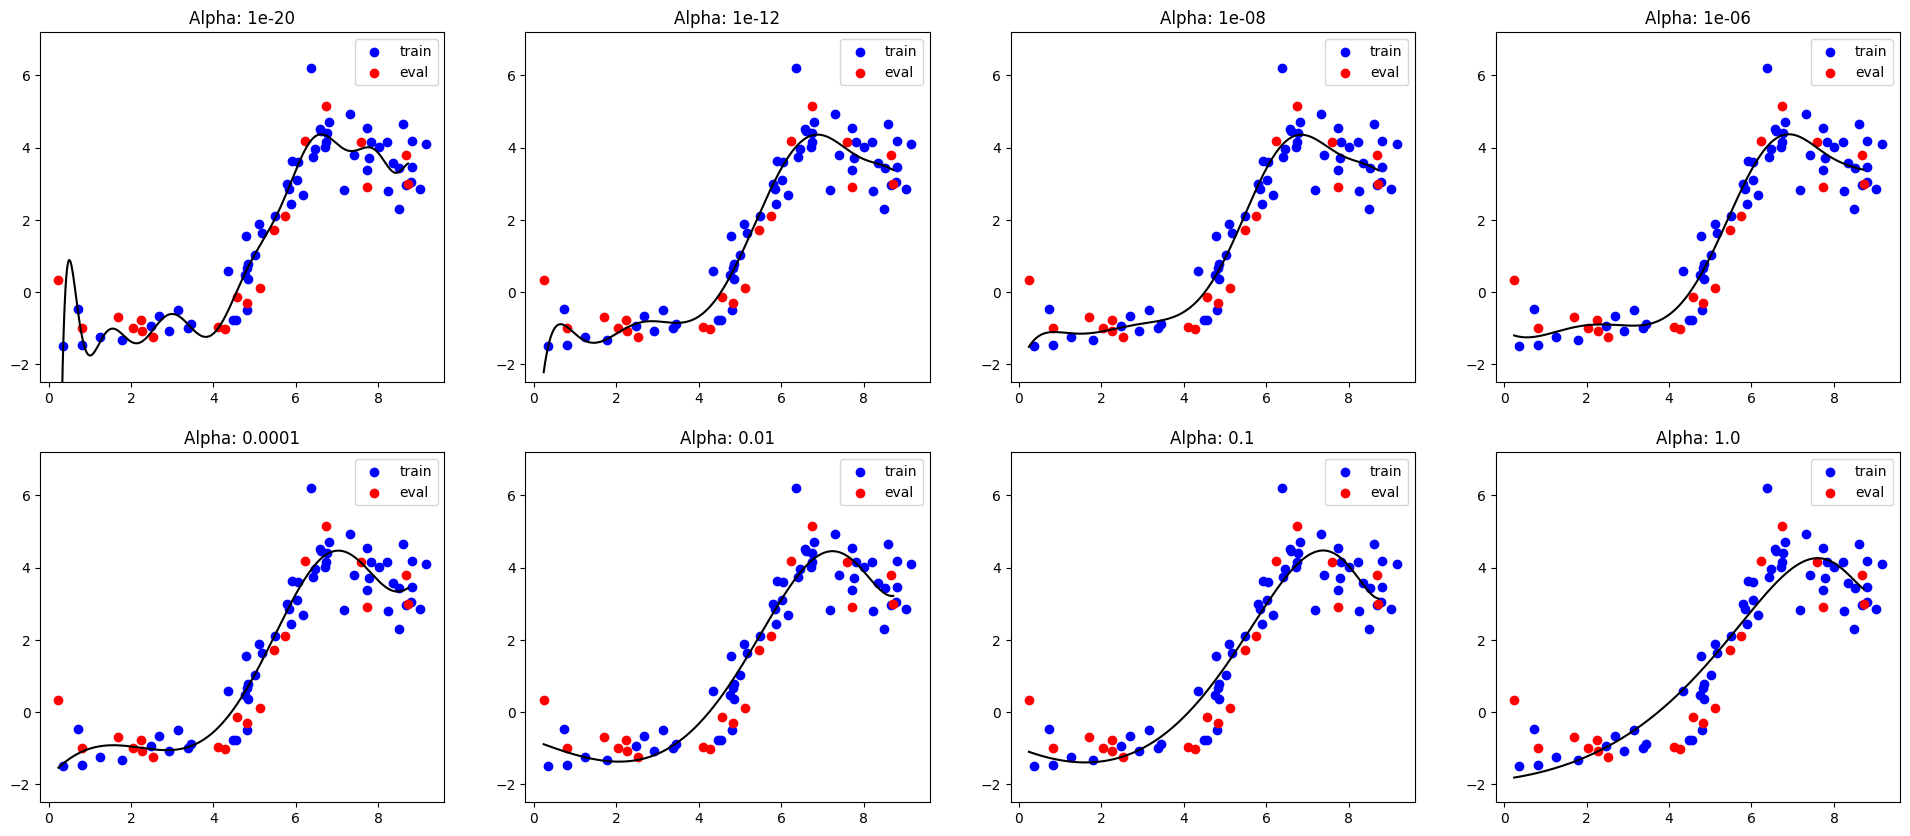

In [73]:
alphas = [1e-20, 1e-12, 1e-8, 1e-6, 1e-4, 1e-2, 1e-1, 1.]
learners = [ None ]*len(alphas)

fig, ax = plt.subplots(2,4, figsize=(24,10))

for i,alpha in enumerate(alphas):

    ### YOUR CODE STARTS HERE ###
    # define high-dim transform, scaling, and ridge regression learner
    pipe = Pipeline( [
        ('phi' , PolynomialFeatures(degree=18, include_bias=True)), 
        ('scale',StandardScaler()),
        ('linreg', Ridge(alpha=alpha))
    ])

    # Fit your learner and save it to your list
    learners[i] = pipe.fit(Xt, Yt)     

    # predict on eval data 
    Xe_spaced = np.linspace(min(Xe), max(Xe), 500).reshape(-1, 1)
    y_pred = pipe.predict(Xe_spaced)   
    
    axi = ax[i//4,i%4]
    # plot the data and your prediction function
    axi.plot(Xe_spaced, y_pred, color='black') 
    # plot train and eval data 
    axi.scatter(Xt, Yt, color='blue', label="train")
    axi.scatter(Xe, Ye, color='red', label="eval")
    # set a consistent y-scale for comparison
    axi.set_ylim([Yt.min() -1 , Yt.max() + 1])   
    # label plots 
    axi.set_title(f"Alpha: {alpha}")   
    axi.legend()     

    ###  YOUR CODE ENDS HERE  ###


## P5.2: Training and Test Performance

Using your trained models, evaluate the training and test MSE as a function of the regularization $\alpha$.  Plot these functions. (It is best to use a log-scale for both alpha and MSE, for clarity.)

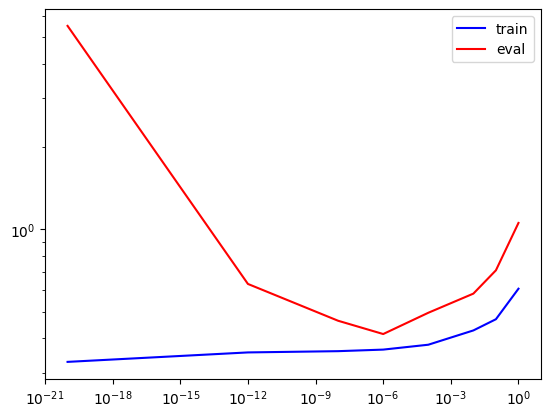

In [79]:
mse_train = [0]*len(alphas)
mse_test = [0]*len(alphas)

for i,alpha in enumerate(alphas):

    pipe = Pipeline( [
        ('phi' , PolynomialFeatures(degree=18, include_bias=True)), 
        ('scale',StandardScaler()),
        ('linreg', Ridge(alpha=alpha))
    ])

    # fit in train data 
    pipe.fit(Xt, Yt)

    # predict 
    y_pred_train = pipe.predict(Xt)
    y_pred_eval = pipe.predict(Xe)

    mse_train[i] = np.square(np.subtract(Yt, y_pred_train)).mean()
    mse_test[i] = np.square(np.subtract(Ye, y_pred_eval)).mean()

# plot mse_train and mse_test as a function of the regularization
plt.loglog(alphas, mse_train, color='blue', label='train');  
plt.loglog(alphas, mse_test, color='red', label='eval');
plt.legend();

## P5.3: Model Selection
Which regularization value $\alpha$ would you select?  Identify in which regions $\alpha$ is underfitting or overfitting.

i would select the value of 10^-6 for alpha as ar this value, the model seems to best generalize to the eval data. at higher values of alpha like 1.0, both training and eval MSE increase suggesting that the model is underfitting. on the other hand, at very low values of alpha like 10^-20, training MSE is low but eval MSE is super high indicating that the model is overfitting - it is fitting to the trainign data well but performing poorly on unseen data. 

---
### Statement of Collaboration (5 points)

It is **mandatory** to include a Statement of Collaboration in each submission, with respect to the guidelines below. Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.

All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments, in particular, I encourage the students to organize (perhaps using EdD) to
discuss the task descriptions, requirements, bugs in my code, and the relevant technical content before they start
working on it. However, you should not discuss the specific solutions, and, as a guiding principle, you are not
allowed to take anything written or drawn away from these discussions (i.e. no photographs of the blackboard,
written notes, referring to EdD, etc.). Especially after you have started working on the assignment, try
to restrict the discussion to EdD as much as possible, so that there is no doubt as to the extent of your
collaboration.

i did not collaborate with anyone during the completion of this assignment. 